In [1]:
# Everything up to this chapter has been in the 2nd edition of the book
# we are now moving onto the 3rd edition - this is TensorFlow 2 rather than 1

#Creating tensors - from a list or a NumPy array

import tensorflow as tf
import numpy as np

np.set_printoptions(precision=3)

a = np.array([1, 2, 3], dtype = np.int32)
b = [4, 5, 6]

t_a = tf.convert_to_tensor(a)
t_b = tf.convert_to_tensor(b)

print(t_a)
print(t_b)



tf.Tensor([1 2 3], shape=(3,), dtype=int32)
tf.Tensor([4 5 6], shape=(3,), dtype=int32)


In [2]:
t_ones = tf.ones((2, 3))
t_ones.shape


TensorShape([2, 3])

In [3]:
# To access the values that a tensor refers to, we can call .numpy()

t_ones.numpy()

array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

In [4]:
# Can create a tensor of constant values
const_tensor = tf.constant([1.2, 5, np.pi],
                          dtype=tf.float32)
print(const_tensor)

tf.Tensor([1.2   5.    3.142], shape=(3,), dtype=float32)


In [7]:
#Using .cast() to change the data type of a tensor

t_a_new = tf.cast(t_a, tf.int64)
print(t_a_new.dtype)

<dtype: 'int64'>


In [10]:
#You may need to change the shape, add a new dimension, or squeeze unnecessary dimensons of your tensor

#Transposing a tensor
t = tf.random.uniform(shape = (3, 5))

t_tr = tf.transpose(t)

print(t.shape, '-->', t_tr.shape)

(3, 5) --> (5, 3)


In [12]:
#Reshaping a tensor - from 1D vector to a 2D array

t = tf.zeros((30,))
t_reshape = tf.reshape(t, shape = (5, 6))
print(t_reshape.shape)
t_reshape.numpy()

(5, 6)


array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]], dtype=float32)

In [17]:
#Removing unnecessary dimensions (dimesions that have size 1, which are not needed)

t = tf.zeros((1, 2, 1, 4, 1))
t_sqz = tf.squeeze(t, axis = (2, 4))
print(t.shape, '-->', t_sqz.shape)


(1, 2, 1, 4, 1) --> (1, 2, 4)


array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.]]], dtype=float32)

In [18]:
# Applying mathematical operations to tensors
# Instantiate two random tensors - one with uniform distribution (-1, 1) and other standard normal

tf.random.set_seed(1)

t1 = tf.random.uniform(shape = (5, 2), 
                      minval=-1.0, maxval=1.0)

t2 = tf.random.normal(shape = (5,2),
                     mean=0.0, stddev=1.0)



In [19]:
#Computing element-wise product of t1 and t2
t3 = tf.multiply(t1, t2).numpy()
print(t3)

[[-0.27  -0.874]
 [-0.017 -0.175]
 [-0.296 -0.139]
 [-0.727  0.135]
 [-0.401  0.004]]


In [23]:
# The mean, standard deviation, and sum can be done: tf.math.reduce_mean(),
# tf.math.reduce_sum(), tf.math.reduce_std()

t4 = tf.math.reduce_mean(t1, axis = 0)
print(t4)

tf.Tensor([0.09  0.207], shape=(2,), dtype=float32)


In [28]:
#Matrix-Matrix product between t1 and t2 (t1 x t2^T) - tf.linalg.matmul()

t5 = tf.linalg.matmul(t1, t2, transpose_b=True)
print(t5.numpy())

[[-1.144  1.115 -0.87  -0.321  0.856]
 [ 0.248 -0.191  0.25  -0.064 -0.331]
 [-0.478  0.407 -0.436  0.022  0.527]
 [ 0.525 -0.234  0.741 -0.593 -1.194]
 [-0.099  0.26   0.125 -0.462 -0.396]]


In [30]:
# Can transpose t1 for the same multiplication and end up with a 2x2 matrix

t6 = tf.linalg.matmul(t1, t1, transpose_a=True)
print(t6.numpy())

[[ 1.698 -0.747]
 [-0.747  0.804]]


In [31]:
# can use the tf.norm() function for computing the L^P norm of a tensor
norm_t1 = tf.norm(t1, ord = 2, axis = 1).numpy()
print(norm_t1)

[1.046 0.293 0.504 0.96  0.383]


In [32]:
np.sqrt(np.sum(np.square(t1), axis = 1))

array([1.046, 0.293, 0.504, 0.96 , 0.383], dtype=float32)

In [33]:
#Split, stack, and concatenate tensors

# Providing the number of splits (must be divisible)
tf.random.set_seed(1)
t = tf.random.uniform((6, ))
print(t.numpy())

[0.165 0.901 0.631 0.435 0.292 0.643]


In [34]:
t_splits = tf.split(t, num_or_size_splits=3)
[item.numpy() for item in t_splits]

#Tensor of size 6 is divided into 3 tensors of size 2

[array([0.165, 0.901], dtype=float32),
 array([0.631, 0.435], dtype=float32),
 array([0.292, 0.643], dtype=float32)]

In [35]:
# Instead of defining the number of splits - can specify the size of the ouput tensors
tf.random.set_seed(1)

t = tf.random.uniform((5,))
print(t.numpy())

[0.165 0.901 0.631 0.435 0.292]


In [36]:
t_splits = tf.split(t, num_or_size_splits=[3, 2])
[item.numpy() for item in t_splits]

#Here a tensor of size 5 is split into two tensors of size 3 and 2

[array([0.165, 0.901, 0.631], dtype=float32),
 array([0.435, 0.292], dtype=float32)]

In [37]:
# Concatenating or stacking tensors

#Concat two 1D tensors (sizes 3 and 2) into 1 1D tensor of size 5
A = tf.ones((3, ))
B = tf.zeros((2, ))
C = tf.concat([A, B], axis = 0)
print(C.numpy())

[1. 1. 1. 0. 0.]


In [38]:
# Stacking 1D tensors into 2D tensor
A = tf.ones((3, ))
B = tf.zeros((3,))
S = tf.stack([A, B], axis = 1)
print(S.numpy())

[[1. 0.]
 [1. 0.]
 [1. 0.]]


In [39]:
#Creating tensorflow Datasets from existing tensors

a = [1.2, 3.4, 7.5, 4.1, 5.0, 1.0]
ds = tf.data.Dataset.from_tensor_slices(a)
print(ds)


<TensorSliceDataset shapes: (), types: tf.float32>


In [40]:
#Datasets are useful for iterating through individual elements in the input dataset

for item in ds:
    print(item)

tf.Tensor(1.2, shape=(), dtype=float32)
tf.Tensor(3.4, shape=(), dtype=float32)
tf.Tensor(7.5, shape=(), dtype=float32)
tf.Tensor(4.1, shape=(), dtype=float32)
tf.Tensor(5.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)


In [42]:
#If we want to create batches from this dataset with a desired batch size of 3

ds_batch = ds.batch(3)
for i, elem in enumerate(ds_batch, 1):
    print('batch {}:'.format(i), elem.numpy())

batch 1: [1.2 3.4 7.5]
batch 2: [4.1 5.  1. ]


In [43]:
# Combining two tensors into a joint dataset
# sometimes its necessary to join two tensors (feature values and labels)

tf.random.set_seed(1)

t_x = tf.random.uniform([4, 3], dtype=tf.float32)
t_y = tf.range(4)

# Now we join the data sets - note that a one-to-one correspondence between elements is necessary

ds_x = tf.data.Dataset.from_tensor_slices(t_x)
ds_y = tf.data.Dataset.from_tensor_slices(t_y)

ds_joint = tf.data.Dataset.zip((ds_x, ds_y))

for example in ds_joint:
    print(' x:', example[0].numpy(),
         '  y:', example[1].numpy())


 x: [0.165 0.901 0.631]   y: 0
 x: [0.435 0.292 0.643]   y: 1
 x: [0.976 0.435 0.66 ]   y: 2
 x: [0.605 0.637 0.614]   y: 3


In [44]:
#Can also do the above in a different way

ds_joint = tf.data.Dataset.from_tensor_slices((t_x, t_y))

for example in ds_joint:
    print(' x:', example[0].numpy(),
         '  y:', example[1].numpy())

 x: [0.165 0.901 0.631]   y: 0
 x: [0.435 0.292 0.643]   y: 1
 x: [0.976 0.435 0.66 ]   y: 2
 x: [0.605 0.637 0.614]   y: 3


In [46]:
# Applying transformations on each individual element of a dataset
# Transforming the t_x data from the (0, 1) range to (-1, 1) range

ds_trans = ds_joint.map(lambda x, y: (x*2-1.0, y))

for example in ds_trans:
    print(' x:', example[0].numpy(),
         '  y:', example[1].numpy())


 x: [-0.67   0.803  0.262]   y: 0
 x: [-0.131 -0.416  0.285]   y: 1
 x: [ 0.952 -0.13   0.32 ]   y: 2
 x: [0.21  0.273 0.229]   y: 3


In [47]:
# For training NN models using stochastic gradient descent optimization
# it is necessary to feed training data as randomly shuffled batches

# using .batch() it is possible to also shuffle and iterate over the datasets

tf.random.set_seed(1)

#Shuffled version of the dataset
ds = ds_joint.shuffle(buffer_size=len(t_x))

for example in ds:
    print(' x:', example[0].numpy(),
         '  y:', example[1].numpy())
    
# The rows are shuffled without losing the one-to-one correspondance between
# the entries in x and y

#Example - y = 2 is now the first row instead of the 3rd row

 x: [0.976 0.435 0.66 ]   y: 2
 x: [0.435 0.292 0.643]   y: 1
 x: [0.165 0.901 0.631]   y: 0
 x: [0.605 0.637 0.614]   y: 3


In [49]:
#Creating batches from the ds_joint dataset

ds = ds_joint.batch(batch_size=3, 
                   drop_remainder=False) # drop reminder is for when it is not divisible

batch_x, batch_y = next(iter(ds))

print('Batch-x:\n', batch_x.numpy())
print('Batch-y:\n', batch_y.numpy())

Batch-x:
 [[0.165 0.901 0.631]
 [0.435 0.292 0.643]
 [0.976 0.435 0.66 ]]
Batch-y:
 [0 1 2]


In [50]:
# Also, when training a model for multiple epochs, we need to shuffle
# and iterate over the dataset by the number of epochs

ds = ds_joint.batch(3).repeat(count = 2)
for i, (batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.shape, batch_y.numpy())
    
#This creates two copies of each batch

0 (3, 3) [0 1 2]
1 (1, 3) [3]
2 (3, 3) [0 1 2]
3 (1, 3) [3]


In [52]:
#If we change the order of the operands (batch and repeat) we get different results

ds = ds_joint.repeat(count = 2).batch(3)
for i, (batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.shape, batch_y.numpy())

#Only creates 3 batches rather than the four created earlier

0 (3, 3) [0 1 2]
1 (3, 3) [3 0 1]
2 (2, 3) [2 3]


In [53]:
#Experimenting with the order of the operands

## Order 1: shuffle -> batch -> repeat

tf.random.set_seed(1)
ds = ds_joint.shuffle(4).batch(2).repeat(3)

for i, (batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.shape, batch_y.numpy())


0 (2, 3) [2 1]
1 (2, 3) [0 3]
2 (2, 3) [0 3]
3 (2, 3) [1 2]
4 (2, 3) [3 0]
5 (2, 3) [1 2]


In [54]:
## Order 2: batch -> shuffle -> repeat

tf.random.set_seed(1)
ds = ds_joint.batch(2).shuffle(4).repeat(3)

for i, (batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.shape, batch_y.numpy())

0 (2, 3) [0 1]
1 (2, 3) [2 3]
2 (2, 3) [0 1]
3 (2, 3) [2 3]
4 (2, 3) [2 3]
5 (2, 3) [0 1]


In [ ]:
# What we see is in order 1 - there is the expected shuffling 
# but in order 2 - the elements within the batch are not shuffled

In [55]:
## order 3: batch -> repeat -> shuffle

tf.random.set_seed(1)
ds = ds_joint.batch(2).repeat(3).shuffle(4)
for i, (batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.shape, batch_y.numpy())

0 (2, 3) [0 1]
1 (2, 3) [0 1]
2 (2, 3) [2 3]
3 (2, 3) [2 3]
4 (2, 3) [0 1]
5 (2, 3) [2 3]


In [2]:
#Creating a dataset from files stored locally

import pathlib

imgdir_path = pathlib.Path('cat_dog_images')
file_list = sorted([str(path) for path in
                   imgdir_path.glob('*.jpg')])

Image shape:  (900, 1200, 3)
Image shape:  (900, 1200, 3)
Image shape:  (900, 742, 3)
Image shape:  (800, 1200, 3)
Image shape:  (800, 1200, 3)
Image shape:  (900, 1200, 3)


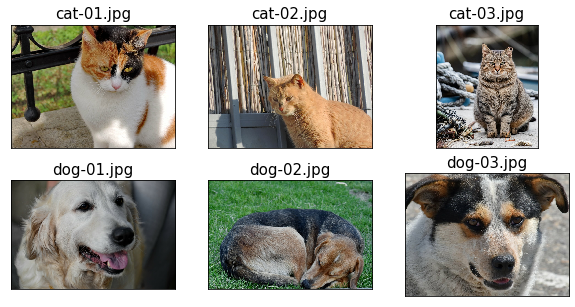

In [3]:
# Next we'll visualize the images using MatPlotLib

import matplotlib.pyplot as plt
import os

fig = plt.figure(figsize = (10, 5))

for i, file in enumerate(file_list):
    img_raw = tf.io.read_file(file)
    img = tf.image.decode_image(img_raw)
    print('Image shape: ', img.shape)
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(img)
    ax.set_title(os.path.basename(file), size = 15)
plt.tight_layout
plt.show()

In [61]:
#Changing the labels associated with the photos to 1 = dogs and 0 = cats

labels = [1 if 'dog' in os.path.basename(file) else 0
         for file in file_list]
print(labels)

[0, 0, 0, 1, 1, 1]


In [62]:
# Creating a joint dataset from the labels and the filenames (paths for the images)

ds_files_labels = tf.data.Dataset.from_tensor_slices(
                            (file_list, labels))

for item in ds_files_labels:
    print(item[0].numpy(), item[1].numpy())

b'cat_dog_images/cat-01.jpg' 0
b'cat_dog_images/cat-02.jpg' 0
b'cat_dog_images/cat-03.jpg' 0
b'cat_dog_images/dog-01.jpg' 1
b'cat_dog_images/dog-02.jpg' 1
b'cat_dog_images/dog-03.jpg' 1


In [4]:
# Now we will transform the ds_files_labels dataset 
# we need to, load the image content from the file path, decode the raw content,
# and resize to desired size

# Will use a helper function to this since it is multiple transformations

def load_and_preprocess(path, label):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels = 3)
    image = tf.image.resize(image, [img_height, img_width])
    image /= 255.0
    return image, label

In [ ]:
img_width, img_height = 120, 80
ds_images_labels = ds_files_labels.map(load_and_preprocess)

fig = plt.figure(figsize = (10, 6))
for i, example in enumerate(ds_images_labels):
    ax = fig.add_subplot(2, 3, i + 1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(example[0])
    ax.set_title('{}'.format(example[1].numpy(),
                            size = 15))
plt.tight_layout()
plt.show()

In [6]:
#Looking at the available datasets in TensorFlow

import tensorflow_datasets as tfds
print(len(tfds.list_builders()))
print(tfds.list_builders()[:5])

173
['abstract_reasoning', 'aeslc', 'aflw2k3d', 'amazon_us_reviews', 'arc']


In [ ]:
mnist, mnist_info = tfds.load('')

In [20]:
#There are two ways of fetching a dataset

#First approach: 
# 1) Calling the dataset builder function
# 2) Executing the download_and_prepare() function
# 3) Calling the as_dataset() method

celeba_bldr = tfds.builder('celeb_a')

print(celeba_bldr.info.features)

FeaturesDict({
    'attributes': FeaturesDict({
        '5_o_Clock_Shadow': tf.bool,
        'Arched_Eyebrows': tf.bool,
        'Attractive': tf.bool,
        'Bags_Under_Eyes': tf.bool,
        'Bald': tf.bool,
        'Bangs': tf.bool,
        'Big_Lips': tf.bool,
        'Big_Nose': tf.bool,
        'Black_Hair': tf.bool,
        'Blond_Hair': tf.bool,
        'Blurry': tf.bool,
        'Brown_Hair': tf.bool,
        'Bushy_Eyebrows': tf.bool,
        'Chubby': tf.bool,
        'Double_Chin': tf.bool,
        'Eyeglasses': tf.bool,
        'Goatee': tf.bool,
        'Gray_Hair': tf.bool,
        'Heavy_Makeup': tf.bool,
        'High_Cheekbones': tf.bool,
        'Male': tf.bool,
        'Mouth_Slightly_Open': tf.bool,
        'Mustache': tf.bool,
        'Narrow_Eyes': tf.bool,
        'No_Beard': tf.bool,
        'Oval_Face': tf.bool,
        'Pale_Skin': tf.bool,
        'Pointy_Nose': tf.bool,
        'Receding_Hairline': tf.bool,
        'Rosy_Cheeks': tf.bool,
        'Sidebu

In [8]:
print(celeba_bldr.info.features['image'])

Image(shape=(218, 178, 3), dtype=tf.uint8)


In [9]:
print(celeba_bldr.info.features['attributes'].keys())

dict_keys(['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace', 'Wearing_Necktie', 'Young'])


In [10]:
print(celeba_bldr.info.citation)

@inproceedings{conf/iccv/LiuLWT15,
  added-at = {2018-10-09T00:00:00.000+0200},
  author = {Liu, Ziwei and Luo, Ping and Wang, Xiaogang and Tang, Xiaoou},
  biburl = {https://www.bibsonomy.org/bibtex/250e4959be61db325d2f02c1d8cd7bfbb/dblp},
  booktitle = {ICCV},
  crossref = {conf/iccv/2015},
  ee = {http://doi.ieeecomputersociety.org/10.1109/ICCV.2015.425},
  interhash = {3f735aaa11957e73914bbe2ca9d5e702},
  intrahash = {50e4959be61db325d2f02c1d8cd7bfbb},
  isbn = {978-1-4673-8391-2},
  keywords = {dblp},
  pages = {3730-3738},
  publisher = {IEEE Computer Society},
  timestamp = {2018-10-11T11:43:28.000+0200},
  title = {Deep Learning Face Attributes in the Wild.},
  url = {http://dblp.uni-trier.de/db/conf/iccv/iccv2015.html#LiuLWT15},
  year = 2015
}


In [11]:
# Now we call the download_and_prepare() method - will download and store
# the data to the disk in a designated folder - will check if already downloaded as well

celeba_bldr.download_and_prepare()

#This is broken - there seems to be an issue with the website - it has been moved - checksum error

/Users/santiagocassalett/anaconda3/envs/py37/lib/python3.7/site-packages/urllib3/connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,
/Users/santiagocassalett/anaconda3/envs/py37/lib/python3.7/site-packages/urllib3/connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,
/Users/santiagocassalett/anaconda3/envs/py37/lib/python3.7/site-packages/urllib3/connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,
/Users/santiagocass

NonMatchingChecksumError: Artifact https://drive.google.com/uc?export=download&id=0B7EVK8r0v71pZjFTYXZWM3FlRnM, downloaded to /Users/santiagocassalett/tensorflow_datasets/downloads/ucexport_download_id_0B7EVK8r0v71pZjFTYXZWM3FlDDaXUAQO8EGH_a7VqGNLRtW52mva1LzDrb-V723OQN8.tmp.99c419f80db64479899ede33090df606/uc, has wrong checksum. This might indicate:
 * The website may be down (e.g. returned a 503 status code). Please check the url.
 * For Google Drive URLs, try again later as Drive sometimes rejects downloads when too many people access the same URL. See https://github.com/tensorflow/datasets/issues/1482
 * The original datasets files may have been updated. In this case the TFDS dataset builder should be updated to use the new files and checksums. Sorry about that. Please open an issue or send us a PR with a fix.
 * If you're adding a new dataset, don't forget to register the checksums as explained in: https://www.tensorflow.org/datasets/add_dataset#2_run_download_and_prepare_locally


In [21]:
#Instead of doing the above which appears to be broken and cannot figure out how to fix
# we will use method #2 which is simply using the wrapper .load()

mnist, mnist_info = tfds.load('mnist', with_info = True,
                             shuffle_files = False)

print(mnist_info)

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.





Dataset mnist downloaded and prepared to /Users/santiagocassalett/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='mnist',
    version=3.0.1,
    description='The MNIST database of handwritten digits.',
    homepage='http://yann.lecun.com/exdb/mnist/',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann. lecun. com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)



In [22]:
print(mnist.keys())

dict_keys(['test', 'train'])


In [23]:
#The dataset is split into two partitions - will transform the train partition
# to convert the elements from a dictionary into a tuple and visualize 10 examples

ds_train = mnist['train']
ds_train = ds_train.map(lambda item:
                       (item['image'], item['label']))
ds_train = ds_train.batch(10)

batch = next(iter(ds_train))
print(batch[0].shape, batch[1])

(10, 28, 28, 1) tf.Tensor([4 1 0 7 8 1 2 7 1 6], shape=(10,), dtype=int64)


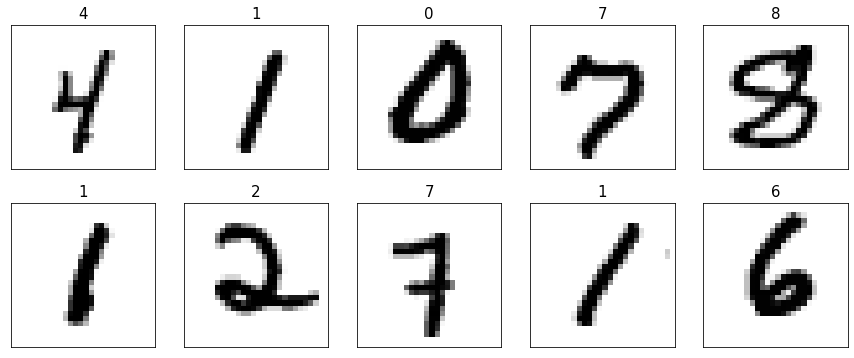

In [24]:
fig = plt.figure(figsize=(15, 6))
for i, (image, label) in enumerate(zip(batch[0], batch[1])):
    ax = fig.add_subplot(2, 5, i + 1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(image[:, :, 0], cmap='gray_r')
    ax.set_title('{}'.format(label),size = 15)

plt.show()

#Point of the above was to learn basic utility of TensorFlow

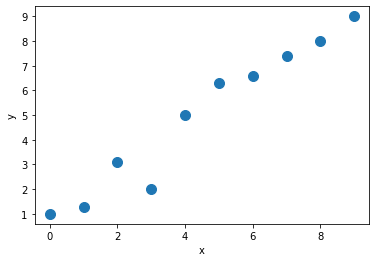

In [25]:
#Building NN models with TensorFlow starting with Linear Regression

X_train = np.arange(10).reshape(10, 1)
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3,
                   6.6, 7.4, 8.0, 9.0])

plt.plot(X_train, y_train, 'o', markersize = 10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [26]:
# Standardized the features (mean centering and dividing by the std)

X_train_norm = (X_train - np.mean(X_train))/np.std(X_train)
ds_train_orig = tf.data.Dataset.from_tensor_slices(
                                    (tf.cast(X_train_norm, tf.float32),
                                     tf.cast(y_train, tf.float32)))

In [28]:
#Defining a new class for our linear regression model - defining a model from scratch
# our model: y = wx + b, w = weights and b = bias

class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.w = tf.Variable(0.0, name = 'weight')
        self.b = tf.Variable(0.0, name = 'bias')
    
    def call(self, x):
        return self.w * x + self.b


In [29]:
#Need to specify the dimensionality of the input (number of features) to the model
# in order to access the .summary() method from keras.Model

model = MyModel()
model.build(input_shape=(None, 1))
model.summary()

Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [30]:
# Defining the cost function as MSE and using stochastic gradient descent as the weight parameter learner
# Will use tf.GradientTape to compute the gradient rather than doing it by hand

def loss_fn(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as tape:
        current_loss = loss_fn(model(inputs), outputs)
    
    dW, db = tape.gradient(current_loss, [model.w, model.b])
    model.w.assign_sub(learning_rate * dW)
    model.b.assign_sub(learning_rate * db)


In [31]:
# We can now set the hyperparameters and train the model for 200 epochs
# We create a batched version of the dataset and repeat the dataset with count=None
# This will result in an infinitely repeating dataset

tf.random.set_seed(1)

num_epochs = 200
log_steps = 100
learning_rate = 0.001
batch_size = 1
steps_per_epoch = int(np.ceil(len(y_train) / batch_size))

ds_train = ds_train_orig.shuffle(buffer_size=len(y_train)) # randomizing the dataset
ds_train = ds_train.repeat(count = None) # infinite number of repeats
ds_train = ds_train.batch(1) # only 1 batch
Ws, bs = [], []

for i, batch in enumerate(ds_train):
    if i >= steps_per_epoch * num_epochs:
        #break the infinite loop
        break
    Ws.append(model.w.numpy())
    bs.append(model.b.numpy())
    
    bx, by = batch
    loss_val = loss_fn(model(bx), by)
    
    train(model, bx, by, learning_rate=learning_rate)
    if i%log_steps == 0: # the % is the modulo (reminder)
        print('Epoch {:4d} Step {:2d} Loss {:6.4f}'.format(
                                    int(i / steps_per_epoch), i, loss_val))

Epoch    0 Step  0 Loss 43.5600
Epoch   10 Step 100 Loss 0.7530
Epoch   20 Step 200 Loss 20.1759
Epoch   30 Step 300 Loss 23.3976
Epoch   40 Step 400 Loss 6.3481
Epoch   50 Step 500 Loss 4.6356
Epoch   60 Step 600 Loss 0.2411
Epoch   70 Step 700 Loss 0.2036
Epoch   80 Step 800 Loss 3.8177
Epoch   90 Step 900 Loss 0.9416
Epoch  100 Step 1000 Loss 0.7035
Epoch  110 Step 1100 Loss 0.0348
Epoch  120 Step 1200 Loss 0.5404
Epoch  130 Step 1300 Loss 0.1170
Epoch  140 Step 1400 Loss 0.1195
Epoch  150 Step 1500 Loss 0.0944
Epoch  160 Step 1600 Loss 0.4670
Epoch  170 Step 1700 Loss 2.0695
Epoch  180 Step 1800 Loss 0.0020
Epoch  190 Step 1900 Loss 0.3612


In [38]:
#Look at the trained model and plot it

print('Final Parameters: ', model.w.numpy(), model.b.numpy())

Final Parameters:  2.6576622 4.8798566


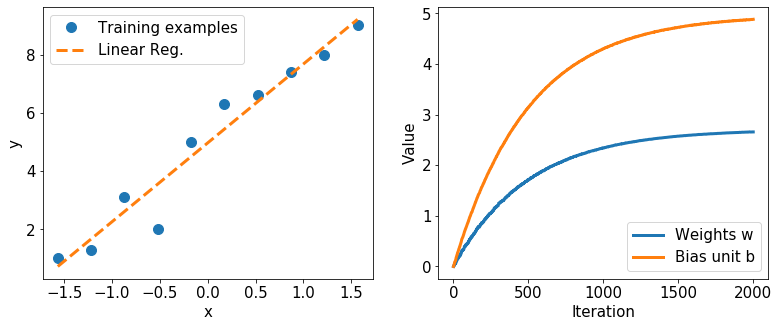

In [42]:
#Creating a test dataset

X_test = np.linspace(0, 9, num = 100).reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train) #use the standardization of the train ds
y_pred = model(tf.cast(X_test_norm, dtype = tf.float32)) # creates a tf tensor - also runs model

fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, 'o', markersize = 10)
plt.plot(X_test_norm, y_pred, '--', lw = 3)
plt.legend(['Training examples', 'Linear Reg.'], fontsize = 15)
ax.set_xlabel('x', size = 15)
ax.set_ylabel('y', size = 15)
ax.tick_params(axis = 'both', which = 'major', labelsize = 15)

ax = fig.add_subplot(1, 2, 2)
plt.plot(Ws, lw = 3)
plt.plot(bs, lw = 3)
plt.legend(['Weights w', 'Bias unit b'], fontsize = 15)
ax.set_xlabel('Iteration', size = 15)
ax.set_ylabel('Value', size = 15)
ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.show()

In [40]:
# Model training via the .compile() and .fit() methods

tf.random.set_seed(1)
model = MyModel()
model.compile(optimizer = 'sgd',
             loss = loss_fn,
             metrics = ['mae', 'mse'])

In [41]:
# Now we can call the .fit() method to train the model
# Dont need to pass a batched dataset but can just pass the numpy arrays directly

model.fit(X_train_norm, y_train,
         epochs = num_epochs, batch_size=batch_size,
         verbose = 1)

#The model.w.numpy() and model.b.numpy() for this model is almost the same
# as the one from scratch

Epoch 1/200
10/10 [==============================] - 0s 1ms/step - loss: 27.8723 - mae: 4.5654 - mse: 27.8723
Epoch 2/200
10/10 [==============================] - 0s 1ms/step - loss: 18.6586 - mae: 3.7446 - mse: 18.6586
Epoch 3/200
10/10 [==============================] - 0s 2ms/step - loss: 12.5239 - mae: 3.0454 - mse: 12.5239
Epoch 4/200
10/10 [==============================] - 0s 2ms/step - loss: 8.4670 - mae: 2.4907 - mse: 8.4670
Epoch 5/200
10/10 [==============================] - 0s 6ms/step - loss: 5.7632 - mae: 2.0567 - mse: 5.7632
Epoch 6/200
10/10 [==============================] - 0s 11ms/step - loss: 3.9697 - mae: 1.7232 - mse: 3.9697
Epoch 7/200
10/10 [==============================] - 0s 3ms/step - loss: 2.7766 - mae: 1.4752 - mse: 2.7766
Epoch 8/200
10/10 [==============================] - 0s 2ms/step - loss: 1.9861 - mae: 1.2578 - mse: 1.9861
Epoch 9/200
10/10 [==============================] - 0s 3ms/step - loss: 1.4572 - mae: 1.0978 - mse: 1.4572
Epoch 10/200
10/10 [=

10/10 [==============================] - 0s 3ms/step - loss: 0.4140 - mae: 0.4936 - mse: 0.4140
Epoch 151/200
10/10 [==============================] - 0s 4ms/step - loss: 0.4139 - mae: 0.4885 - mse: 0.4139
Epoch 152/200
10/10 [==============================] - 0s 2ms/step - loss: 0.4139 - mae: 0.4876 - mse: 0.4139
Epoch 153/200
10/10 [==============================] - 0s 2ms/step - loss: 0.4133 - mae: 0.4937 - mse: 0.4133
Epoch 154/200
10/10 [==============================] - 0s 2ms/step - loss: 0.4140 - mae: 0.4925 - mse: 0.4140
Epoch 155/200
10/10 [==============================] - 0s 2ms/step - loss: 0.4135 - mae: 0.4933 - mse: 0.4135
Epoch 156/200
10/10 [==============================] - 0s 2ms/step - loss: 0.4139 - mae: 0.4902 - mse: 0.4139
Epoch 157/200
10/10 [==============================] - 0s 2ms/step - loss: 0.4136 - mae: 0.4907 - mse: 0.4136
Epoch 158/200
10/10 [==============================] - 0s 3ms/step - loss: 0.4130 - mae: 0.4830 - mse: 0.4130
Epoch 159/200
10/10 [===

In [45]:
# Building a multilayer perceptron from classifying flowers from iris datatset

iris, iris_info = tfds.load('iris', with_info = True)
print(iris_info)

/Users/santiagocassalett/anaconda3/envs/py37/lib/python3.7/site-packages/urllib3/connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


Shuffling and writing examples to /Users/santiagocassalett/tensorflow_datasets/iris/2.0.0.incompleteVDJ4DJ/iris-train.tfrecord


Dataset iris downloaded and prepared to /Users/santiagocassalett/tensorflow_datasets/iris/2.0.0. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='iris',
    version=2.0.0,
    description='This is perhaps the best known database to be found in the pattern recognition
literature. Fisher's paper is a classic in the field and is referenced
frequently to this day. (See Duda & Hart, for example.) The data set contains
3 classes of 50 instances each, where each class refers to a type of iris
plant. One class is linearly separable from the other 2; the latter are NOT
linearly separable from each other.',
    homepage='https://archive.ics.uci.edu/ml/datasets/iris',
    features=FeaturesDict({
        'features': Tensor(shape=(4,), dtype=tf.float32),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
    }),
    total_num_examples=150,
    splits={
        'train': 150,
    },
    supervised_keys=('features', 'label'),
    citation="""@misc{Dua:2019 ,
 

In [46]:
# This dataset only has one partition ('train') so we have to split into training, test, and validation ourselves
# Can do this before loading a dataset via DatasetBuilder or we can do the below
# use .take() and .skip() to split dataset into two - must use reshuffle_each_iteration = False to 
# avoid mixing training and test examples

tf.random.set_seed(1)
ds_orig = iris['train']
ds_orig = ds_orig.shuffle(150, reshuffle_each_iteration = False)

ds_train_orig = ds_orig.take(100)
ds_test = ds_orig.skip(100)



In [48]:
# Need to transform the dictionary into a tuple

ds_train_orig = ds_train_orig.map(
                    lambda x: (x['features'], x['label']))

ds_test = ds_test.map(
                    lambda x: (x['features'], x['label']))

In [49]:
# We will be using the Dense layer of the keras.layers and Sequential class to build an NN
# the Dense layer is also known as a fully connected (FC) layer or linear layer

# We also need to consider the dimensionality (Rank and shape) of the input layer
# Here we define a model with 2 hidden layers:
# 1) receives an input of 4 features and projects them onto 16 neurons
# 2) received the ouput of the first layer (size 16) and projects them into three output neurons
# since we have three class labels

#This can be done using the Sequential class and Dense layer

iris_model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation = 'sigmoid',
                         name = 'fc1', input_shape = (4, )),
    tf.keras.layers.Dense(3, name = 'fc2',
                         activation = 'softmax')]) #softmax is used for multiclassification - 3 class labels

iris_model.summary()
 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Dense)                  (None, 16)                80        
_________________________________________________________________
fc2 (Dense)                  (None, 3)                 51        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [51]:
#Next we compile the model to specify the loss function, optimizer, and metrics for evaluation

iris_model.compile(optimizer='adam',
                  loss = 'sparse_categorical_crossentropy',
                  metrics = ['accuracy'])


In [52]:
# Next we train the model
num_epochs = 100
training_size = 100
batch_size = 2
steps_per_epoch = np.ceil(training_size / batch_size)

ds_train = ds_train_orig.shuffle(buffer_size=training_size)
ds_train = ds_train.repeat()
ds_train = ds_train.batch(batch_size = batch_size)
ds_train = ds_train.prefetch(buffer_size = 1000)

history = iris_model.fit(ds_train, epochs=num_epochs,
                        steps_per_epoch=steps_per_epoch,
                        verbose = 0)

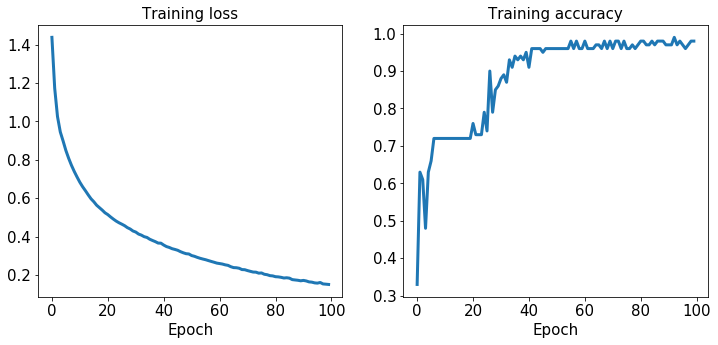

In [53]:
hist = history.history

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(hist['loss'], lw = 3)
ax.set_title('Training loss', size = 15)
ax.set_xlabel('Epoch', size = 15)
ax.tick_params(axis = 'both', which = 'major', labelsize = 15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(hist['accuracy'], lw = 3)
ax.set_title('Training accuracy', size = 15)
ax.set_xlabel('Epoch', size = 15)
ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.show()

In [54]:
#Evaluating the trained model on the test dataset

results = iris_model.evaluate(ds_test.batch(50), verbose = 0)
print('Test loss: {:.4f} Test Acc.: {:.4f}'.format(*results))

Test loss: 0.1483 Test Acc.: 0.9800


In [55]:
#Saving and reloading trained models

iris_model.save('iris-classifier.h5', 
               overwrite = True,
               include_optimizer=True,
               save_format='h5')

In [56]:
#Loading the saved model - model architecture and the weights are saved together
iris_model_new = tf.keras.models.load_model('iris-classifier.h5')

In [57]:
#To verify the architecture of the model
iris_model_new.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Dense)                  (None, 16)                80        
_________________________________________________________________
fc2 (Dense)                  (None, 3)                 51        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [58]:
#Evaluating the new model on the test dataset to verify the results are the same
results = iris_model_new.evaluate(ds_test.batch(33), verbose = 0)
print('Test loss: {:.4f} Test Acc.: {:.4f}'.format(*results))

Test loss: 0.1483 Test Acc.: 0.9800


In [59]:
#Logistic Function Recap

#Logistic function to model the probability that sample x belongs to class 1 - binary classification task

#For illustrative purposes - we will take a 2D data point, x, and model with weight coefficients, w

import numpy as np

X = np.array([1, 1.4, 2.5]) # the first value must be 1 - the original bias unit
w = np.array([0.4, 0.3, 0.5])

def net_input(X, w):
    return np.dot(X, w)

def logistic(z):
    return 1.0 / (1.0 + np.exp(-z))

def logisitic_activation(X, w):
    z = net_input(X, w)
    return logistic(z)

print('P(y=1|x) = %.3f' % logisitic_activation(X, w))


#88.8% probability that this particular sample (x) belongs in the positive class (class 1)
# for those weights and feature values

P(y=1|x) = 0.888


In [62]:
#Demonstrating that an output layer consisting of multiple logistic activation units does not
# produce meaningful, interpertable probability values

# W: an array with shape = (n_output_units, n_hidden_units+1)
# note that the first column are the bias units
W = np.array([[1.1, 1.2, 0.8, 0.4],
            [0.2, 0.4, 1.0, 0.2],
            [0.6, 1.5, 1.2, 0.7]])

# A: an array with shape = (n_hidden_units + 1, n_samples)
# note that the first column in this array must be 1
A = np.array([[1, 0.1, 0.4, 0.6]])

Z = np.dot(W, A[0])

y_probas = logistic(Z)
print('Net input: \n', Z)

print('Output Units:\n', y_probas)

#The results of the output units cannot be interpreted as probabilities in the three-class problem
# because they do not sum to 1.

#Not a big concern if we do not care about class membership probability
# Can use this to predict class labels using maximum value

Net input: 
 [1.78 0.76 1.65]
Output Units:
 [0.856 0.681 0.839]


In [63]:
y_class = np.argmax(Z, axis = 0)
print('Predicted class label: %d' % y_class)

Predicted class label: 0


In [64]:
#Estimating class probabilities in multiclass classification vis softmax
# softmax function is a soft form of the argmax function - provides probability of each class

def softmax(z):
    return np.exp(z) / np.sum(np.exp(z))

y_probas = softmax(Z)
print('Probabilities:\n', y_probas)


Probabilities:
 [0.447 0.161 0.392]


In [65]:
np.sum(y_probas)

1.0

In [66]:
# Can see how to impliment softmax in TensorFlow
# Z is converted to a tensor with an additional dimension reserved for the batch size

import tensorflow as tf

Z_tensor = tf.expand_dims(Z, axis = 0)
tf.keras.activations.softmax(Z_tensor)



<tf.Tensor: shape=(1, 3), dtype=float64, numpy=array([[0.447, 0.161, 0.392]])>

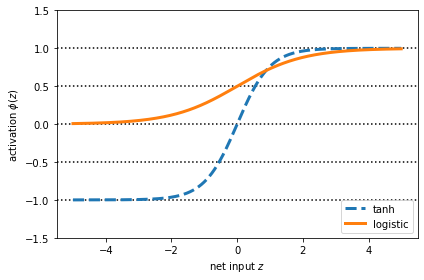

In [68]:
#Hyperbolic tangent (tanh) - rescaled logistic function
# the output spectrum range is able to be (-1, 1) instead of (0, 1) as in logistic function
# can improve convergence in back-propogation algorithm

#Comparison of the two

import matplotlib.pyplot as plt

def tanh(z):
    e_p = np.exp(z)
    e_m = np.exp(-z)
    return (e_p - e_m) / (e_p + e_m)

z = np.arange(-5, 5, 0.005)

log_act = logistic(z)

tanh_act = tanh(z)

plt.ylim([-1.5, 1.5])
plt.xlabel('net input $z$')
plt.ylabel('activation $\phi(z)$')
plt.axhline(1, color = 'black', linestyle = ':')
plt.axhline(0.5, color = 'black', linestyle = ':')
plt.axhline(0.0, color = 'black', linestyle = ':')
plt.axhline(-0.5, color = 'black', linestyle = ':')
plt.axhline(-1, color = 'black', linestyle = ':')
plt.plot(z, tanh_act, 
        linewidth = 3, linestyle = '--',
        label = 'tanh')
plt.plot(z, log_act,
        linewidth = 3,
        label = 'logistic')
plt.legend(loc = 'lower right')
plt.tight_layout()
plt.show()

#We can see similar results but the tanh function has double the output space

In [69]:
#Can also use the built in tf.keras.activation.tanh() to achieve the same result

np.tanh(z)

array([-1., -1., -1., ...,  1.,  1.,  1.])

In [70]:
tf.keras.activations.tanh(z)

<tf.Tensor: shape=(2000,), dtype=float64, numpy=array([-1., -1., -1., ...,  1.,  1.,  1.])>

In [71]:
#The logistic function is available in scipy special

from scipy.special import expit

expit(z)


array([0.007, 0.007, 0.007, ..., 0.993, 0.993, 0.993])

In [72]:
#Also can use the sigmoid from Keras

tf.keras.activations.sigmoid(z)

<tf.Tensor: shape=(2000,), dtype=float64, numpy=array([0.007, 0.007, 0.007, ..., 0.993, 0.993, 0.993])>

In [74]:
# Rectified linear unit activation 
# derivatives of activations with respect to the net input diminishes as z becomes large
# learning weights become slow because the gradient term is close to zero

#ReLU activation is a way to avoid this

#The derivative of ReLU, with respect to the input, is always 1 for positive input values
# solves the issue of vanishing gradients

tf.keras.activations.relu(z)

<tf.Tensor: shape=(2000,), dtype=float64, numpy=array([0.   , 0.   , 0.   , ..., 4.985, 4.99 , 4.995])>